## TQuant Lab Installation

Please check out [Install TQuant Lab](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Install%20TQuant%20Lab.ipynb)

## Data ingest

We can use `os` and set the following environmental parameters to ingest stock price and volume data. 

In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"
os.environ['TEJAPI_KEY'] = "M8jthBxek3B49i7KBLH601gS6q3MRw"
os.environ['ticker'] = "IR0001 2330 2337 0050 2545"
os.environ['mdate'] = "20200821 20230821"

!zipline ingest -b tquant

Merging daily equity files:


[2023-08-21 05:33:20.478362] INFO: zipline.data.bundles.core: Ingesting tquant.


We can use `get_bundle` to get all trading data ingested from above code.

In [2]:
from zipline.data.data_portal import get_bundle
data_bundle = get_bundle(
    bundle_name = 'tquant',
    calendar_name = 'TEJ',
    start_dt = pd.Timestamp("2020-08-21", tz = 'utc'),
    end_dt = pd.Timestamp("2023-08-21", tz = 'utc')
)
data_bundle.head(10)

,date,sid,symbol,asset,open,high,low,close,volume,open_adj,...,close_adj,volume_adj,dividend_payouts.amount,dividend_payouts.declared_date,dividend_payouts.div_percent,dividend_payouts.pay_date,dividend_payouts.record_date,dividends.ratio,splits.ratio,mergers.ratio
0,2020-08-21 00:00:00+00:00,0,0050,Equity(0 [0050]),102.15,103.00,101.70,102.80,8.132000e+06,92.589,...,93.178,8.132000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
1,2020-08-21 00:00:00+00:00,1,2330,Equity(1 [2330]),421.50,427.00,420.00,424.50,4.195600e+07,397.096,...,399.923,4.195600e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
2,2020-08-21 00:00:00+00:00,2,2337,Equity(2 [2337]),28.50,29.00,28.30,29.00,1.957000e+07,24.636,...,25.068,1.957000e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
3,2020-08-21 00:00:00+00:00,3,2545,Equity(3 [2545]),35.80,36.80,35.35,36.45,3.850000e+05,25.480,...,25.943,3.850000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
4,2020-08-21 00:00:00+00:00,4,IR0001,Equity(4 [IR0001]),NaN,NaN,NaN,24220.29,2.322470e+09,NaN,...,24220.290,2.322470e+09,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
5,2020-08-24 00:00:00+00:00,0,0050,Equity(0 [0050]),102.85,103.55,102.30,103.10,3.718000e+06,93.223,...,93.450,3.718000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
6,2020-08-24 00:00:00+00:00,1,2330,Equity(1 [2330]),427.50,434.50,425.00,428.00,4.919900e+07,402.749,...,403.220,4.919900e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
7,2020-08-24 00:00:00+00:00,2,2337,Equity(2 [2337]),29.10,29.70,29.10,29.25,1.713200e+07,25.154,...,25.284,1.713200e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
8,2020-08-24 00:00:00+00:00,3,2545,Equity(3 [2545]),36.40,36.80,36.05,36.60,1.670000e+05,25.907,...,26.049,1.670000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
9,2020-08-24 00:00:00+00:00,4,IR0001,Equity(4 [IR0001]),NaN,NaN,NaN,24299.76,1.669478e+09,NaN,...,24299.760,1.669478e+09,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN


## Strategy Backtesting

In this case, we use the basic buy and hold strategy for demonstration. The traget asset is TSMC and the backtesting period is "2020-08-21" to "2023-08-21".

In [3]:
from zipline.api import set_slippage, set_commission
from zipline.finance import slippage, commission
from zipline.api import order, record, symbol
from zipline import run_algorithm

### Initialize function

`initialize` is one of the key functions for zipline backtesting. This function would be executed once before the backtesting starts. The main purpose for this function is to setup the backtesting environment, mainly setting slippage and commision: 

1. zipline.api.set_slippage: <br>
Set slippage model, TQuant Lab offers 4 different types of model. For detail information, check out [Zipline Slippage](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Slippage.ipynb)
2. zipline.api.set_commission: <br>
Set commission model, TQuant Lab offers 3 different types of model. For detail information, check out [Zipline Commission](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Commission%20Models.ipynb)

Example:
```
def initialize(context):
    set_slippage(slippage.FixedSlippage())
    set_commission(commission.PerShare(cost=0.00285))
```    
Besides, we can notice that there is an argument called __context__ in `initialize` function. It is a persistent namespace for you to store variables you need to access from one algorithm iteration to the next. For example, we can set a variable (context.day = 0) to count the numbers of trading dates and a variable (context.has_ordered = False) to record whether holding the position of TSMC or not.

Example:
```
def initialize(context):
    context.day = 0
    context.has_ordered = False
    set_slippage(slippage.FixedSlippage())
    set_commission(commission.PerShare(cost=0.00285))
```

In [4]:
def initialize(context):
    context.day = 0
    context.has_ordered = False
    set_slippage(slippage.FixedSlippage())
    set_commission(commission.PerShare(cost = 0.00285))

### Handle_data function

`handle_data` is another key functions for zipline backtesting. This function would be executed every trading day. The main purpose for this function is to establish trading strategy, place orders and record trading information.

There are two arguments in `handle_data` - __context__ and __data__. __context__ is basicly the same as above. To record whether we hold TSMC stock in each trading day, we set:
```
def handle_data(context, data):

    # plus 1 in each trading day。
    context.day += 1 

    # check whether we hold TSMC stock in current trading day
    if not context.has_ordered:
```

Then we use `zipline.order` function to place orders. There are 6 differnent types of order methods. For detail information, please check out [Zipline Order (percent & target_percent)](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Order%20(percent%20%26%20target_percent).ipynb), [Zipline Order (value & target_value)](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Order%20(value%20%26%20target_value).ipynb), [Zipline Order (order & order_target)](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/Zipline%20Order%20(order%20%26%20order_target).ipynb). In here, we use the most foundamental one:

### zipline.api.order

Buy or sell n share of assets.

#### Parameters:
* asset: zipline.assets.Asset<br>
target asset
* amount: int <br>
decide n share
* limit_price: float, optional <br>
limit price
* stop_price: float, optional <br>
stop price

After adding the `order(symb("2330"))` for placing order, we set __context.has_ordered__ to True, so we will no longer place order after this trading day.
```
def handle_data(context, data):

    context.day += 1 
    if not context.has_ordered:

        order(symbol("2330", 1000)

        context.has_ordered = True
        
```

Eventually, to record the numbers of trading days, whether we hold TSMC stock or not and stock price, we can use `record` function. This function enable users to record trading information and turn to columns in the dataframe from `run_algorithm`.

record(column name = information)

In today's case, we record the numbers of trading days (context.day), whether holding position or not (context.has_ordered) and today's closed price (data.current(symbol("2330"), "close")). This __data__ is equivalent to __data__ mentioned in `handle_data` arguments. __data__ restores stocks' price and volume information. To get current price or volumw info, we can use `data.current()`.  


### zipline.data.current
Call stocks' current price and colume

#### Parameters:
* assets: zipline.asset.Asset <br>
target asset
* fields: str <br>
target information, 'close', 'open', 'high', 'low' and 'volume'。

We want to record TSMC close price:
```
def handle_data(context, data):
    context.day += 1 
    if not context.has_ordered:
        order(symbol("2330", 1000)
        context.has_ordered = True

    record(
        trade_days = context.day,
        has_ordered = context.has_ordered,
        TSMC = data.current(symbol("2330"), "close")
    )
```

In [5]:
def handle_data(context, data):
    context.day += 1
    if not context.has_ordered:
        order(symbol("2330"), 1000)
        context.has_ordered = True
        
    record(
        trade_days = context.day,
        has_ordered = context.has_ordered,
        TSMC = data.current(symbol("2330"), "close")
    )

### Analyze function

`Analyze` function is for performance and risk visualization. There are two arguments in this function. The first one is __context__, and it is the same as the previously mentioned one. Another one is __perf__, it is the final dataframe from `run_algorithm`. We can use specific columns in the final dataframe for visualization.

In [6]:
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1,title='portfolio values')
    ax2 = plt.subplot(212, sharex=ax1)
    perf['TSMC'].plot(ax=ax2,title='TSMC close')
    plt.gcf().set_size_inches(18, 8)
    plt.show()

### Run_algorithm function

This function is for running the backtest. It will return a performance-related dataframe. For detail information, plz check out [TSMC buy and hold strategy](https://github.com/tejtw/TQuant-Lab/blob/main/lecture/TSMC%20buy%20and%20hold%20strategy.ipynb).

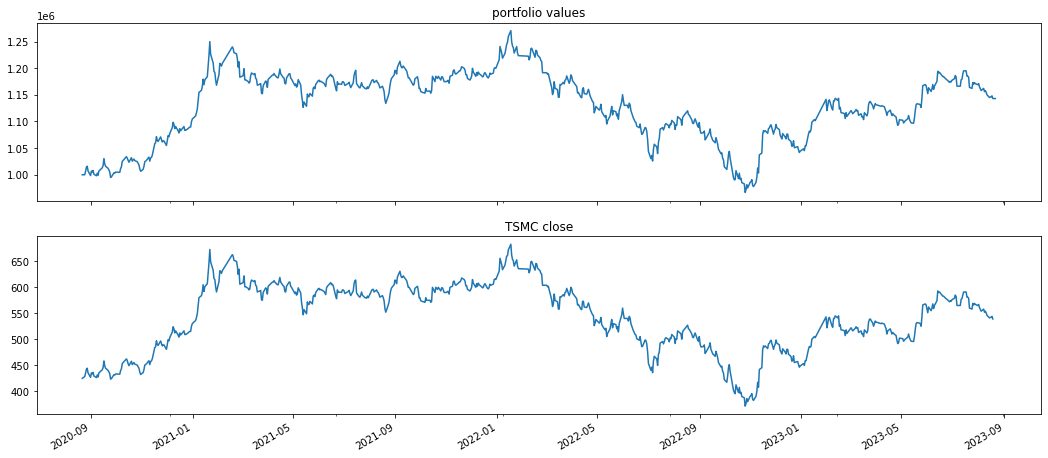

In [7]:
start_date = pd.Timestamp('2020-08-21',tz='utc')
end_date = pd.Timestamp('2023-08-21',tz='utc')

results = run_algorithm(start= start_date,  
                       end=end_date,
                       initialize=initialize,                       
                       capital_base=1e6,                       
                       analyze=analyze,
                       handle_data=handle_data,
                       data_frequency='daily',
                       bundle='tquant'
                       )